# pip instal...

In [ ]:
!pip install razdel

In [ ]:
!pip install transformers evaluate accelerate # векторизатор

In [ ]:
!pip install datasets

# Чтение датасета

In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

In [ ]:
files.upload()

In [ ]:
df =  pd.read_csv("/content/train_aspects.txt", sep = "\t", names=["id", "labels", "text", "start", "end", "sentiment"], index_col = False)
df

,id,labels,text,start,end,sentiment
0,3976,Whole,ресторане,71,80,neutral
1,3976,Whole,ресторанах,198,208,neutral
2,3976,Whole,ресторане,256,265,neutral
3,3976,Service,Столик бронировали,267,285,neutral
4,3976,Service,администратор,322,335,positive
...,...,...,...,...,...,...
4758,16630,Service,обслуживание,85,97,positive
4759,16630,Food,Еда,99,102,positive
4760,16630,Service,персоналу,244,253,positive
4761,16630,Whole,ресторан,294,302,positive


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['start'].plot(kind='hist', bins=20, title='start')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['end'].plot(kind='hist', bins=20, title='end')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='id', y='start', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='start', y='end', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['start'].plot(kind='line', figsize=(8, 4), title='start')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['end'].plot(kind='line', figsize=(8, 4), title='end')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sentiment'].value_counts()
    for x_label, grp in _df_10.groupby('labels')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('labels')
_ = plt.ylabel('sentiment')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['labels'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='id', y='labels', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='id', y='sentiment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['labels'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='start', y='labels', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='start', y='sentiment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Убираем разметку тональности
df = df.drop(["sentiment"], axis=1)
df

,id,labels,text,start,end
0,3976,Whole,ресторане,71,80
1,3976,Whole,ресторанах,198,208
2,3976,Whole,ресторане,256,265
3,3976,Service,Столик бронировали,267,285
4,3976,Service,администратор,322,335
...,...,...,...,...,...
4758,16630,Service,обслуживание,85,97
4759,16630,Food,Еда,99,102
4760,16630,Service,персоналу,244,253
4761,16630,Whole,ресторан,294,302


# Разделение на клаузы

In [ ]:
from razdel import tokenize, sentenize
import copy

In [ ]:
def clause_splitter(text):
    splitters = ':;,().…'

    conj = ['а', 'но', 'однако', 'чтобы', 'потому что', 'если',
        'несмотря на', 'хотя', 'так что', 'или', 'либо',]

    result = []
    for sent in list(sentenize(text)):
        s = sent.text.lower()
        parts = [s,]
        for splt in splitters:
            new_parts = []
            for part in parts:
                new_parts.extend(part.split(splt))
            parts = copy.deepcopy(new_parts)


        good_parts = []
        for part in parts:
            part = part.strip(' ')
            if len(part) > 5:
                if len(part.split(' ')) < 8:
                    good_parts.append(part)
                else:
                    splitted = False
                    for c in conj:
                        if f' {c} ' in part and not part.startswith(f'{c} '):
                            good_parts.extend(part.split(f' {c} '))
                            splitted = True
                            break
                    if not splitted:
                        good_parts.append(part)

        # наконец, место в тексте
        for gp in good_parts:
            if len(gp) > 5:
                result.append((gp.strip(' '),
                              sent.start+s.index(gp),
                              sent.start+s.index(gp)+len(gp)))
    return result

In [ ]:
# понадобится для работы со сгенерированными данными
def clause_splitter_wo_id(text):
    splitters = ':;,().…'

    conj = ['а', 'но', 'однако', 'чтобы', 'потому что', 'если',
        'несмотря на', 'хотя', 'так что', 'или', 'либо',]

    result = []
    for sent in list(sentenize(text)):
        s = sent.text.lower()
        parts = [s,]
        for splt in splitters:
            new_parts = []
            for part in parts:
                new_parts.extend(part.split(splt))
            parts = copy.deepcopy(new_parts)


        good_parts = []
        for part in parts:
            part = part.strip(' ')
            if len(part) > 5:
                if len(part.split(' ')) < 8:
                    good_parts.append(part)
                else:
                    splitted = False
                    for c in conj:
                        if f' {c} ' in part and not part.startswith(f'{c} '):
                            good_parts.extend(part.split(f' {c} '))
                            splitted = True
                            break
                    if not splitted:
                        good_parts.append(part)
        # наконец, место в тексте
        for gp in good_parts:
            if len(gp) > 5:
                result.append(gp.strip(' '))
    return result

In [ ]:
df_reviews = pd.read_csv("/content/train_reviews.txt", sep = "\t", names=["id", "text"], index_col = False)
df_reviews

,id,text
0,3976,"День 8-го марта прошёл, можно и итоги подвести..."
1,30808,Отмечали в этом ресторане день рождение на пер...
2,14031,Хочу поделиться своим впечатлением от посещени...
3,2495,Добрый день! Были вчера с друзьями в этом кафе...
4,38835,Отметили с мужем годовщину свадьбы 6 ноября в ...
...,...,...
279,6962,Очаровательная Виктория просила об отзыве и я ...
280,9878,Пришли в данное заведение 4 июня 2014 года пок...
281,28258,Заехали с мужем поужинать в пятницу ( 17.01.14...
282,33043,Мне так там нравитсяяяя!!!!!!!!! Интерьер модн...


In [ ]:
df_reviews['text'] = df_reviews['text'].apply(clause_splitter)
df_reviews

,id,text
0,3976,"[(день 8-го марта прошёл, 0, 22), (можно и ито..."
1,30808,[(отмечали в этом ресторане день рождение на п...
2,14031,[(хочу поделиться своим впечатлением от посеще...
3,2495,"[(добрый день!, 0, 12), (были вчера с друзьями..."
4,38835,[(отметили с мужем годовщину свадьбы 6 ноября ...
...,...,...
279,6962,[(очаровательная виктория просила об отзыве и ...
280,9878,[(пришли в данное заведение 4 июня 2014 года п...
281,28258,"[(заехали с мужем поужинать в пятницу, 0, 35),..."
282,33043,"[(мне так там нравитсяяяя!!!!!!!!!, 0, 32), (и..."


In [ ]:
# Применяем explode к столбцу "sentences"
df_exploded = df_reviews.explode('text')

# Создаем новые столбцы на основе элементов в кортежах
df_exploded[['text', 'start', 'end']] = pd.DataFrame(df_exploded['text'].tolist(), index=df_exploded.index)

df_exploded

,id,text,start,end
0,3976,день 8-го марта прошёл,0,22
0,3976,можно и итоги подвести,24,46
0,3976,решил написать отзыв о ресторане в котором отм...,48,127
0,3976,прочитал отзывы edik077 и rules77777и понял что,129,176
0,3976,мы были вразных ресторанах,182,208
...,...,...,...,...
283,16630,могу сказать одно,192,209
283,16630,я была приятно удивлена!,211,235
283,16630,спасибо персоналу,236,253
283,16630,ему удается создать ощущение,255,283


In [ ]:
# Расширяем спаны для второго датасета
df['expanded_span'] = list(zip(df['start'], df['end']))

def map_aspect(row):
    for span, aspect in zip(df['expanded_span'], df['labels']):
        if row['start'] >= span[0] and row['end'] <= span[1]:
            return aspect
    return "no_asp"

# Применяем функцию
df_exploded['labels'] = df_exploded.apply(map_aspect, axis=1)

df_exploded

,id,text,start,end,labels
0,3976,день 8-го марта прошёл,0,22,no_asp
0,3976,можно и итоги подвести,24,46,Whole
0,3976,решил написать отзыв о ресторане в котором отм...,48,127,no_asp
0,3976,прочитал отзывы edik077 и rules77777и понял что,129,176,no_asp
0,3976,мы были вразных ресторанах,182,208,Food
...,...,...,...,...,...
283,16630,могу сказать одно,192,209,Service
283,16630,я была приятно удивлена!,211,235,Food
283,16630,спасибо персоналу,236,253,Service
283,16630,ему удается создать ощущение,255,283,no_asp


# Анализ датасета


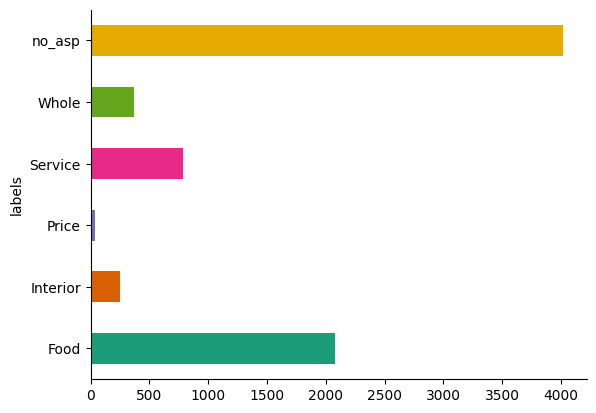

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_exploded.groupby('labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Датасет несбалансирован, сократим кол-во данных, не отнесённых ни к какому аспекту, и добавим сгенерированные с помощью ChatGPT отзывы про цену и интерьер

In [ ]:
# Отделяем данные no_asp от остальных
df_noasp = df_exploded[df_exploded["labels"] == "no_asp"]
df_exploded_w_asp = df_exploded[df_exploded["labels"] != "no_asp"]
df_exploded_w_asp

,id,text,start,end,labels
0,3976,можно и итоги подвести,24,46,Whole
0,3976,мы были вразных ресторанах,182,208,Food
0,3976,но теперь о ресторане,244,265,Food
0,3976,в ресторане было человек 70-80,474,504,Food
0,3976,а принесли нам немало,665,686,Food
...,...,...,...,...,...
283,16630,милый и отзывчивый персонал,37,64,Whole
283,16630,стоит ли говорить,104,121,Service
283,16630,могу сказать одно,192,209,Service
283,16630,я была приятно удивлена!,211,235,Food


In [ ]:
df_noasp = df_noasp.reset_index()
df_noasp

,index,id,text,start,end,labels
0,0,3976,день 8-го марта прошёл,0,22,no_asp
1,0,3976,решил написать отзыв о ресторане в котором отм...,48,127,no_asp
2,0,3976,прочитал отзывы edik077 и rules77777и понял что,129,176,no_asp
3,0,3976,либо у ребят что-то незаладилось,210,242,no_asp
4,0,3976,столик бронировали заранее и сделали так как п...,267,337,no_asp
...,...,...,...,...,...,...
4011,283,16630,очень внимательное обслуживание,66,97,no_asp
4012,283,16630,что трудно удивить человека,123,150,no_asp
4013,283,16630,привыкшего и знающего грузинскую кухню,152,190,no_asp
4014,283,16630,ему удается создать ощущение,255,283,no_asp


In [ ]:
import numpy as np

# Случайным образом выбираем индексы, которые будут удалены
indices_to_drop = np.random.randint(0, 3974, 2500).tolist()

# Удаляем выбранные строки из DataFrame
df_noasp = df_noasp.drop(index = indices_to_drop, axis = 0)

df_noasp

,index,id,text,start,end,labels
5,0,3976,сделали предварительный заказ,341,370,no_asp
7,0,3976,тут действительно горячее блюдо можно ждать ве...,506,562,no_asp
8,0,3976,меню достаточно разнообразное и весьма вкусное,564,610,no_asp
9,0,3976,мне и моим друзьям понравилось всё что нам при...,612,663,no_asp
10,0,3976,обслуживание может и не самое лучьшее в городе,688,734,no_asp
...,...,...,...,...,...,...
4011,283,16630,очень внимательное обслуживание,66,97,no_asp
4012,283,16630,что трудно удивить человека,123,150,no_asp
4013,283,16630,привыкшего и знающего грузинскую кухню,152,190,no_asp
4014,283,16630,ему удается создать ощущение,255,283,no_asp


In [ ]:
# Соединяем этот датасет с основным
df_exploded = pd.concat([df_exploded_w_asp, df_noasp], axis=0)

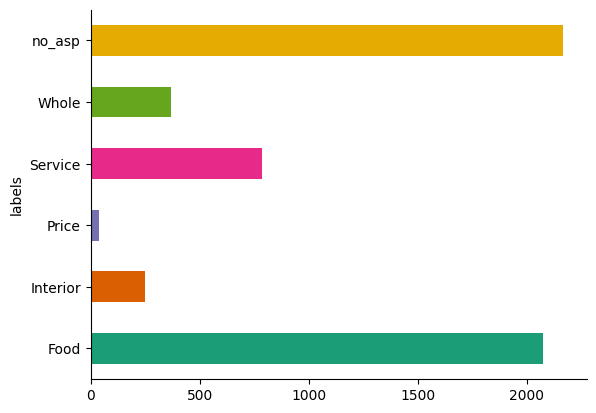

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_exploded.groupby('labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Теперь загружаем сгенерированные данные и работаем с ними:

In [ ]:
files.upload()

In [ ]:
with open("reviews.txt", "r") as f:
  list_of_strings = f.readlines()
print(list_of_strings)

['0\n', '\n', '1. {ASPECT: Price, SENTIMENT: negative, TEXT: Цены в этом ресторане зашкаливают! За такие деньги можно поесть в другом месте куда больше и вкуснее.}\n', '2. {ASPECT: Interior, SENTIMENT: positive, TEXT: Уютный интерьер, создающий атмосферу уединения и спокойствия. Очень приятное место для ужина вдвоем.}\n', '3. {ASPECT: Price, SENTIMENT: neutral, TEXT: Цены здесь средние, не дешево, но и не очень дорого. За качество еды и обслуживание платить готов.}\n', '4. {ASPECT: Interior, SENTIMENT: negative, TEXT: Интерьер слишком скучный и устаревший, не создает никакого желания проводить время в этом ресторане.}\n', '5. {ASPECT: Price, SENTIMENT: positive, TEXT: Приятно удивлена ценами - качественное блюдо по очень приемлемой цене.}\n', '6. {ASPECT: Interior, SENTIMENT: neutral, TEXT: Интерьер обычный, ничем не выделяется, но это не мешает насладиться едой.}\n', '7. {ASPECT: Price, SENTIMENT: negative, TEXT: За такую еду цены явно завышены. Не оправдало ожиданий.}\n', '8. {ASPECT

In [ ]:
data = []
for s in list_of_strings:
  if len(s) > 3:
    d = {
        'text': s.split("TEXT: ")[1][:-1],
        'labels': s.split("ASPECT: ")[1].split(",")[0].strip()
    }
    data.append(d)

# Создание DataFrame из списка словарей
df_generated = pd.DataFrame(data)

# Вывод полученного DataFrame
df_generated.to_csv("dfghjik.csv")

In [ ]:
df_generated

,text,labels
0,Цены в этом ресторане зашкаливают! За такие де...,Price
1,"Уютный интерьер, создающий атмосферу уединения...",Interior
2,"Цены здесь средние, не дешево, но и не очень д...",Price
3,"Интерьер слишком скучный и устаревший, не созд...",Interior
4,Приятно удивлена ценами - качественное блюдо п...,Price
...,...,...
495,Интерьер ресторана оставляет равнодушным. Ни п...,Interior
496,Цены на блюда и напитки просто космические. Не...,Price
497,Интерьер этого ресторана - настоящее произведе...,Interior
498,Цены в этом ресторане вполне себе разумные. Не...,Price


Делим на клаузы:

In [ ]:
df_generated["text"] = df_generated['text'].apply(clause_splitter_wo_id)

In [ ]:
df_generated

,text,labels
0,"[цены в этом ресторане зашкаливают!, за такие ...",Price
1,"[уютный интерьер, создающий атмосферу уединени...",Interior
2,"[цены здесь средние, не дешево, но и не очень ...",Price
3,"[интерьер слишком скучный и устаревший, не соз...",Interior
4,[приятно удивлена ценами - качественное блюдо ...,Price
...,...,...
495,"[интерьер ресторана оставляет равнодушным, ни ...",Interior
496,"[цены на блюда и напитки просто космические, н...",Price
497,[интерьер этого ресторана - настоящее произвед...,Interior
498,"[цены в этом ресторане вполне себе разумные, н...",Price


In [ ]:
# Применяем explode к столбцу "sentences"
df_generated = df_generated.explode('text')

# Создаем новые столбцы на основе элементов в кортежах
df_generated[['text']] = pd.DataFrame(df_generated['text'].tolist(), index=df_generated.index)
# Вывод результата
df_generated

,text,labels
0,цены в этом ресторане зашкаливают!,Price
0,за такие деньги можно поесть в другом месте ку...,Price
1,уютный интерьер,Interior
1,создающий атмосферу уединения и спокойствия,Interior
1,очень приятное место для ужина вдвоем,Interior
...,...,...
498,цены в этом ресторане вполне себе разумные,Price
498,не дешево,Price
498,но и не очень дорого,Price
499,интерьер заведения вызывает разочарование,Interior


Финальный датасет:

In [ ]:
df_final = pd.concat([df_exploded, df_generated], axis=0)
df_final = df_final.drop(["id", "start", "end", "index"], axis=1)
df_final

,text,labels
0,можно и итоги подвести,Whole
0,мы были вразных ресторанах,Food
0,но теперь о ресторане,Food
0,в ресторане было человек 70-80,Food
0,а принесли нам немало,Food
...,...,...
498,цены в этом ресторане вполне себе разумные,Price
498,не дешево,Price
498,но и не очень дорого,Price
499,интерьер заведения вызывает разочарование,Interior


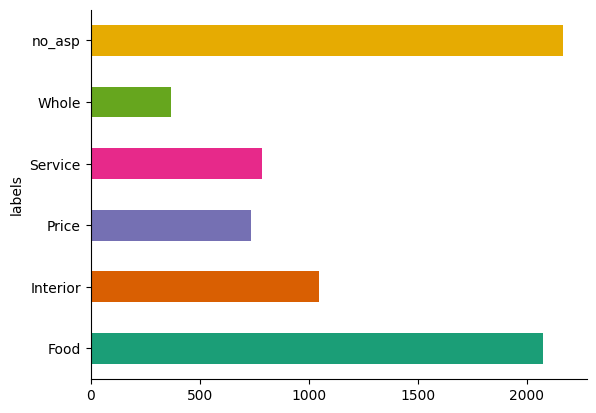

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_final.groupby('labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Подготовка данных

In [ ]:
from sklearn.model_selection import train_test_split

# разделение на тестовую и тренировочную выборки
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
import datasets
from datasets import Dataset, DatasetDict

tds = Dataset.from_pandas(train_data)
vds = Dataset.from_pandas(test_data)

ds = DatasetDict()

ds['train'] = tds
ds['validation'] = vds

print(ds)

DatasetDict({
    train: Dataset({
        features: ['id', 'labels', 'text', 'start', 'end', '__index_level_0__'],
        num_rows: 3810
    })
    validation: Dataset({
        features: ['id', 'labels', 'text', 'start', 'end', '__index_level_0__'],
        num_rows: 953
    })
})


In [ ]:
# токенизатор для отзывов
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
# переводим классы из строк в числа
from datasets import ClassLabel

labels = ClassLabel(num_classes = 5,names=["Whole", "Service", "Price", "Interior", "Food"])

In [ ]:
def tokenize(batch):
    tokens = tokenizer(batch['text'], padding=True, truncation=True, max_length=128)
    tokens['labels'] = labels.str2int(batch['labels'])
    return tokens

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
tokenized_corpus_train = tds.map(tokenize, batched=True)
tokenized_corpus_test = vds.map(tokenize, batched=True)

tokenized_corpus_train.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
tokenized_corpus_test.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

Map:   0%|          | 0/3810 [00:00<?, ? examples/s]

Map:   0%|          | 0/953 [00:00<?, ? examples/s]

In [ ]:
print(tokenized_corpus_train)

Dataset({
    features: ['id', 'labels', 'text', 'start', 'end', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 3810
})


In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
id2label = {0: "Whole", 1: "Service", 2: "Price", 3: "Interior", 4: "Food"}
label2id = {"Whole": 0, "Service": 1, "Price": 2, "Interior": 3, "Food": 4}

# Дообучение модели

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=5, id2label=id2label, label2id=label2id
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [ ]:
training_args = TrainingArguments(
    output_dir="distilbert-base-uncased_aspect_model",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.001,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_corpus_train,
    eval_dataset=tokenized_corpus_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.617835,0.820567
2,No log,0.436878,0.878279
3,No log,0.383260,0.888772
4,No log,0.343031,0.904512
5,0.533700,0.331616,0.907660


TrainOutput(global_step=600, training_loss=0.48989150047302243, metrics={'train_runtime': 121.2111, 'train_samples_per_second': 157.164, 'train_steps_per_second': 4.95, 'total_flos': 310503117832260.0, 'train_loss': 0.48989150047302243, 'epoch': 5.0})

In [ ]:
torch.save(model.state_dict(), 'saved_weights_aspect.pt')

In [ ]:
model_new = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=6, id2label=id2label, label2id=label2id
)
model_new.load_state_dict(torch.load('saved_weights_aspect.pt'))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<All keys matched successfully>

In [ ]:
trainer.save_model("distilbert-base-uncased_aspect_model")